### 01: pytorch workflow fundamentals 
-


## 1. Data

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# create *know* parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Split data into training and test sets

In [ ]:
train_split = int(0.8 * len(X)) 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualize

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='blue', s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c='green', s=4, label="Testing data")

  if predictions is not None:
    # plot the predictions in red
    plt.scatter(test_data, predictions, c='red', s=4, label="Predictions")

  #s show
  plt.legend(prop={"size":14})



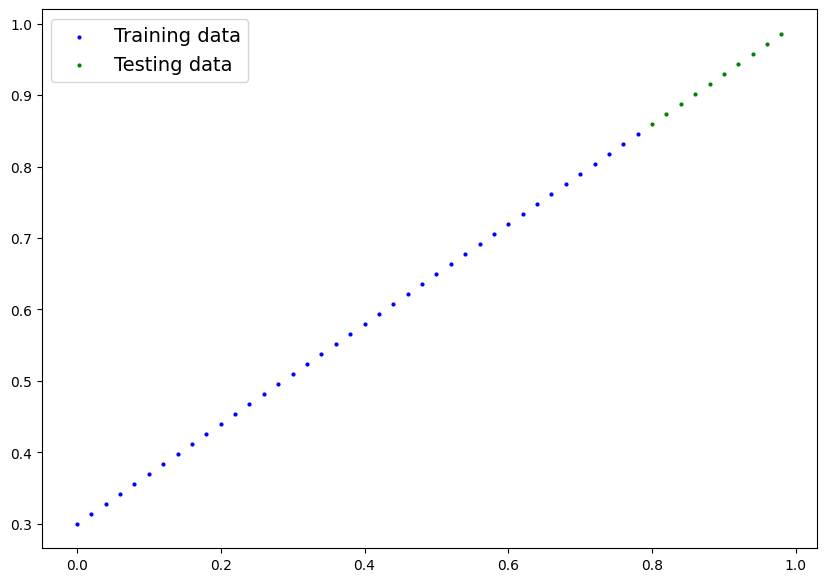

In [ ]:
plot_predictions()

## 2. Build model

In [ ]:
# Create a Linear Regression model clas
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                dtype=torch.float,
                                requires_grad=True))
    
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float,
                             requires_grad=True))
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias                         

# Checking the content of a pytorch model

In [ ]:
# set manial seed
torch.manual_seed(42)

# create model
model_0 = LinearRegressionModel()

# check the nn.Parameter(s)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predictions using torch.inference_mode()

In [ ]:
# making predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
# check the predictions
print(f'Number of testing samples: {len(X_test)}')
print(f'Number of predictions made: {len(y_preds)}')
print(f'Predicted values:\n{y_preds}')

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


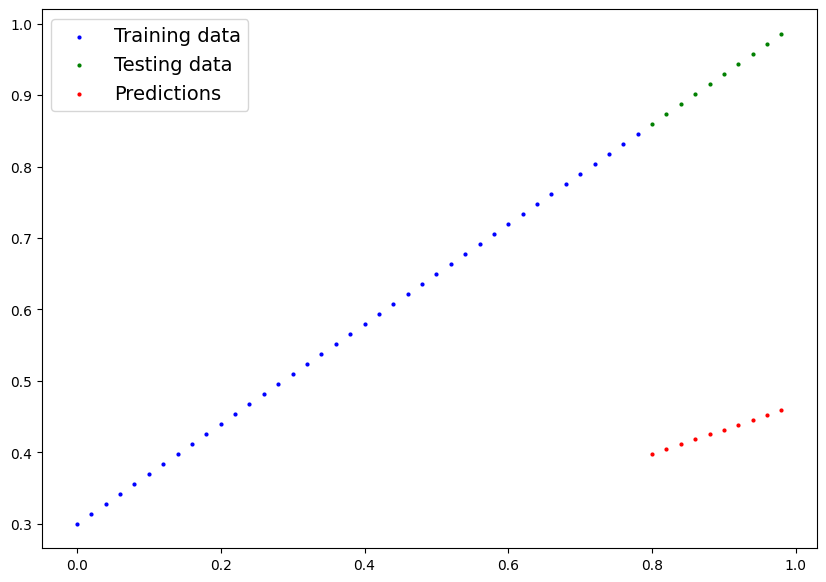

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## 3. Train model

# Create Loss Function and Optimizer

In [ ]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Train Loop


In [ ]:
torch.manual_seed(42)

# set the number of epochs
epochs = 100

# create empyt loss list
train_loss_values = []
test_loss_values = []
epoch_count =[]

for epoch in range(epochs):

  # Put model in training mode
  model_0.train()

  # 1. forward
  y_pred = model_0(X_train)

  # 2. calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. zero gradients
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. progress the optimizer
  optimizer.step()

  # put the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():
    # 1. forward
    test_pred = model_0(X_test)

    # 2. calculate loss on the test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f'Epoch: {epoch}, loss: {loss}, test_loss: {test_loss}')


Epoch: 0, loss: 0.31288138031959534, test_loss: 0.48106518387794495
Epoch: 10, loss: 0.1976713240146637, test_loss: 0.3463551998138428
Epoch: 20, loss: 0.08908725529909134, test_loss: 0.21729660034179688
Epoch: 30, loss: 0.053148526698350906, test_loss: 0.14464017748832703
Epoch: 40, loss: 0.04543796554207802, test_loss: 0.11360953003168106
Epoch: 50, loss: 0.04167863354086876, test_loss: 0.09919948130846024
Epoch: 60, loss: 0.03818932920694351, test_loss: 0.08886633068323135
Epoch: 70, loss: 0.03476089984178543, test_loss: 0.0805937647819519
Epoch: 80, loss: 0.03132382780313492, test_loss: 0.07232122868299484
Epoch: 90, loss: 0.02788739837706089, test_loss: 0.06473556160926819


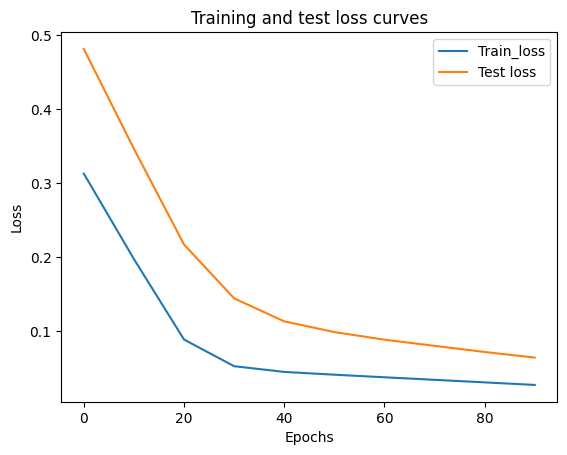

In [ ]:
# plot the loss curves
plt.plot(epoch_count, train_loss_values, label='Train_loss')
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## 4. Making prediction

In [ ]:
# 1. set the model in evaluation mode
model_0.eval()

# 2. setup the inference mode
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

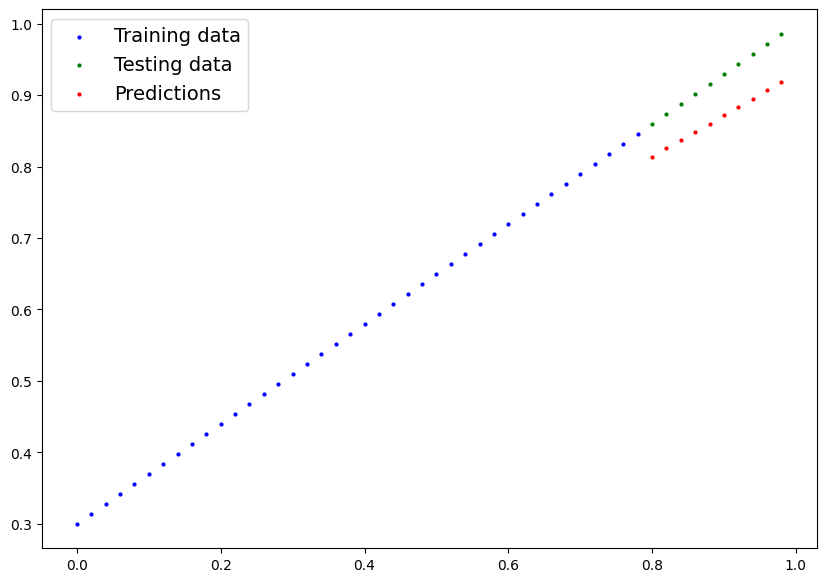

In [ ]:
plot_predictions(predictions=y_preds)

## 5. Saving and Loading model

In [ ]:
from pathlib import Path

# save model
# 1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = '01_pytoch.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytoch.pth


In [ ]:
# Check the saved
! ls -l models/01_pytoch.pth

-rw-r--r-- 1 root root 1071 Apr  5 10:44 models/01_pytoch.pth


In [ ]:
# Load model
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [ ]:
# compare
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Puttung it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu118'

In [ ]:
# setup device
device = "cuda:0" if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


## 6.1 Data

In [ ]:
# create weight and bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building model

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # use nn.Linear
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed when creating the model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set model to GPU
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Training

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# set the number of epochs
epochs = 1000

# put data on GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # training
  model_1.train()

  # 1. forward
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. zero grad optimizer
  optimizer.zero_grad()

  # 4. backward
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  # testing
  model_1.eval()
  # 1. forward
  with torch.inference_mode():
    test_pred = model_1(X_test)
    
    # 2. calculate loss
    test_loss = loss_fn(test_pred, y_test)
  
  if epoch % 100 == 0:
    print(f'Epoch: {epoch}, Train loss: {loss}, test loss:{test_loss}')



Epoch: 0, Train loss: 0.5551779866218567, test loss:0.5739762187004089
Epoch: 100, Train loss: 0.006215683650225401, test loss:0.014086711220443249
Epoch: 200, Train loss: 0.0012645035749301314, test loss:0.013801801018416882
Epoch: 300, Train loss: 0.0012645035749301314, test loss:0.013801801018416882
Epoch: 400, Train loss: 0.0012645035749301314, test loss:0.013801801018416882
Epoch: 500, Train loss: 0.0012645035749301314, test loss:0.013801801018416882
Epoch: 600, Train loss: 0.0012645035749301314, test loss:0.013801801018416882
Epoch: 700, Train loss: 0.0012645035749301314, test loss:0.013801801018416882
Epoch: 800, Train loss: 0.0012645035749301314, test loss:0.013801801018416882
Epoch: 900, Train loss: 0.0012645035749301314, test loss:0.013801801018416882


In [ ]:
# Fine our model's learned parameters
from pprint import pprint
print('for weights and bias')
pprint(model_1.state_dict())
print(f'weights: {weight}, bias: {bias}')

for weights and bias
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])
weights: 0.7, bias: 0.3


## 6.4 Making predictions

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')